In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd 
import statsmodels.api as sm
import seaborn as sns
import pingouin as pg
from matplotlib.colors import ListedColormap
pd.options.mode.chained_assignment = None

In [2]:
measurements = pd.read_excel(r'Z:\grodriguez\CardiacOCT\code\count-distributions\manual_vs_automatic_fct_arc.xlsx')

## Functions

In [3]:
def get_data_filtered(test_sheet, type_manual, type_ai):

    manual = test_sheet[type_manual]

    ai = test_sheet[type_ai]

    list_fp = []
    list_fn = []
    list_nulls = []
    list_drops = []

    for value in range(len(manual)):

        if manual[value] == 0.0 and ai[value] != 0.0:
            list_fp.append(value)

        if manual[value] != 0.0 and ai[value] == 0.0:
            list_fn.append(value)

        if manual[value] == 0.0 and ai[value] == 0.0:
            list_nulls.append(value)

    list_drops.extend(list_fp)
    list_drops.extend(list_fn)
    list_drops.extend(list_nulls)

    ai.drop(list_drops, inplace=True)
    manual.drop(list_drops, inplace=True)

    return manual, ai

In [20]:
def corr_plot(manual, automatic, thresh, title):

    print('Corr {}: {}'.format(title, np.corrcoef(manual, automatic)))

    col = []
    for i, j in zip(manual, automatic):
        if i <= thresh and j >= thresh:
            col.append(0)

        elif i >= thresh and j <= thresh:
            col.append(1)

        else:
            col.append(2)

    classes = ['FP', 'FN', 'TP/TN']
    scatter = plt.scatter(manual, automatic, c=col, cmap=ListedColormap(['black', 'green', 'blue']))
    plt.axhline(thresh, color='r')
    plt.axvline(thresh, color='r')
    plt.xlabel('Manual')
    plt.ylabel('Automatic')
    plt.title(title)
    plt.legend(handles=scatter.legend_elements()[0], labels = classes)
    plt.show()

In [5]:
def calculate_icc(automatic_values, manual_values):

    raters1 = ['Automatic' for _ in range(len(automatic_values))]
    raters2 = ['Manual' for _ in range(len(automatic_values))]
    raters1.extend(raters2)

    exam1 = list(np.arange(0, len(automatic_values)))
    exam2 = list(np.arange(0, len(automatic_values)))
    exam1.extend(exam2)

    values_fct = pd.concat([automatic_values, manual_values])

    icc_df = pd.DataFrame({'exam': exam1, 'raters': raters1, 'fct': values_fct})

    icc = pg.intraclass_corr(icc_df, 'exam', 'raters', 'fct')

    return icc

# Bland Altman manual vs automatic

(-400.0, 400.0)

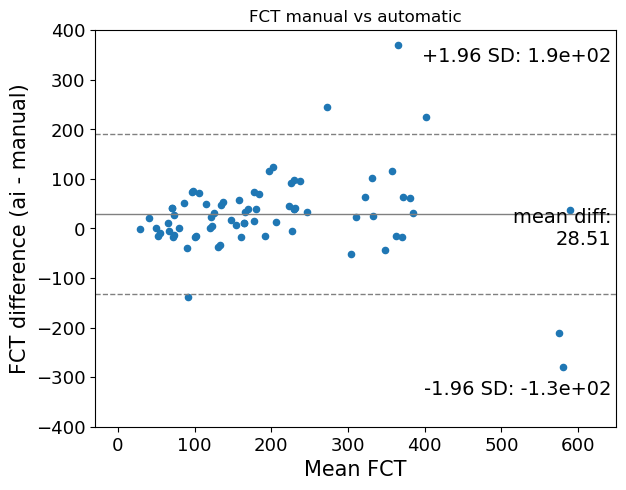

In [22]:
manual_fct, ai_fct_model3 = get_data_filtered(measurements, 'FCT manual', 'FCT model 3 2D')

fig, axes = plt.subplots()

sm.graphics.mean_diff_plot(ai_fct_model3, manual_fct, ax = axes)
plt.xlabel('Mean FCT')
plt.ylabel('FCT difference (ai - manual)')
plt.title('FCT manual vs automatic')
plt.xlim(-30, 650)
plt.ylim(-400, 400)

(-75.0, 150.0)

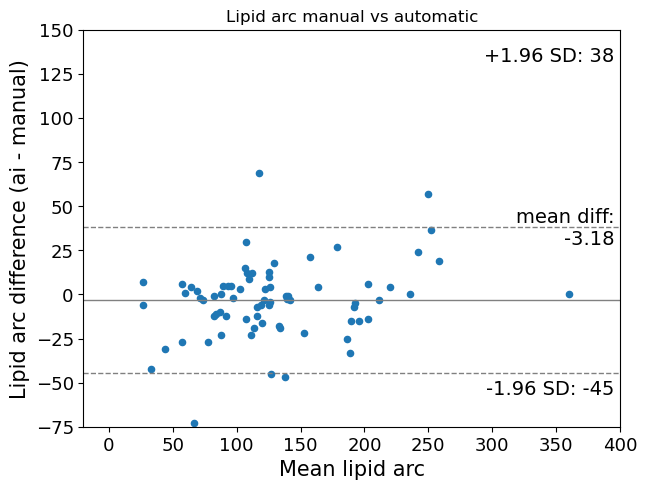

In [23]:
manual_arc, ai_arc_model3 = get_data_filtered(measurements, 'Lipid arc manual', 'Lipid arc model 3 2D')


fig, axes = plt.subplots()

sm.graphics.mean_diff_plot(ai_arc_model3, manual_arc, ax = axes)
plt.xlabel('Mean lipid arc')
plt.ylabel('Lipid arc difference (ai - manual)')
plt.title('Lipid arc manual vs automatic')
plt.xlim(-20, 400)
plt.ylim(-75, 150)


## Pearson and ICC

Corr FCT: [[1.         0.81201449]
 [0.81201449 1.        ]]


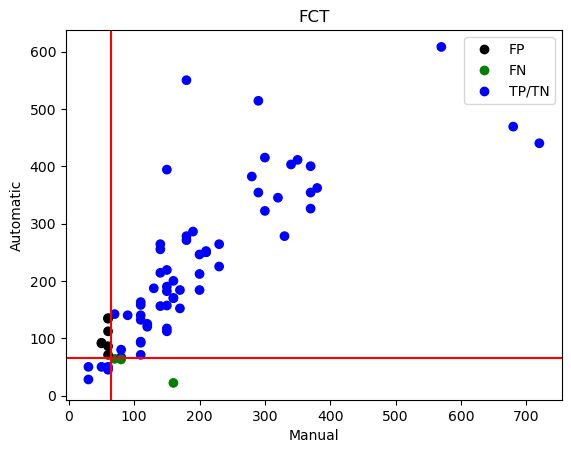

In [28]:
corr_plot(manual_fct, ai_fct_model3, 65, 'FCT')

Corr Lipid arc: [[1.         0.94551798]
 [0.94551798 1.        ]]


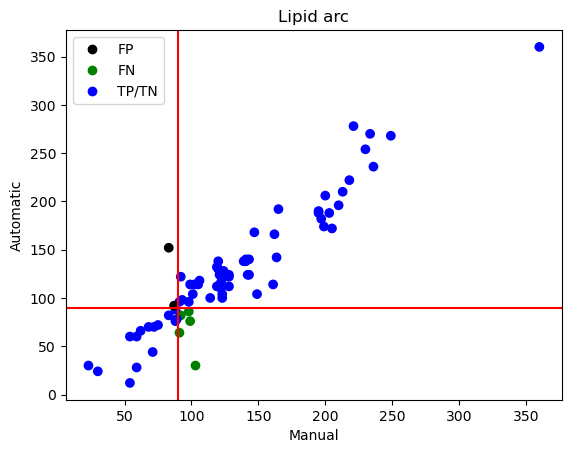

In [29]:
corr_plot(manual_arc, ai_arc_model3, 90, 'Lipid arc')

In [30]:
calculate_icc(ai_fct_model3, manual_fct)

,Type,Description,ICC,F,df1,df2,pval,CI95%
0,ICC1,Single raters absolute,0.794341,8.724846,72,73,1.016091e-17,"[0.69, 0.87]"
1,ICC2,Single random raters,0.796325,9.637562,72,72,8.366632e-19,"[0.68, 0.87]"
2,ICC3,Single fixed raters,0.811987,9.637562,72,72,8.366632e-19,"[0.72, 0.88]"
3,ICC1k,Average raters absolute,0.885385,8.724846,72,73,1.016091e-17,"[0.82, 0.93]"
4,ICC2k,Average random raters,0.886616,9.637562,72,72,8.366632e-19,"[0.81, 0.93]"
5,ICC3k,Average fixed raters,0.896239,9.637562,72,72,8.366632e-19,"[0.83, 0.93]"


In [31]:
calculate_icc(ai_arc_model3, manual_arc)

,Type,Description,ICC,F,df1,df2,pval,CI95%
0,ICC1,Single raters absolute,0.940898,32.839661,73,74,9.029018e-37,"[0.91, 0.96]"
1,ICC2,Single random raters,0.940913,33.128511,73,73,1.730778e-36,"[0.91, 0.96]"
2,ICC3,Single fixed raters,0.941398,33.128511,73,73,1.730778e-36,"[0.91, 0.96]"
3,ICC1k,Average raters absolute,0.969549,32.839661,73,74,9.029018e-37,"[0.95, 0.98]"
4,ICC2k,Average random raters,0.969557,33.128511,73,73,1.730778e-36,"[0.95, 0.98]"
5,ICC3k,Average fixed raters,0.969815,33.128511,73,73,1.730778e-36,"[0.95, 0.98]"


# Manual vs automatic measurements (on manual segs)

## Bland Altman using same manual segmentations

(-400.0, 400.0)

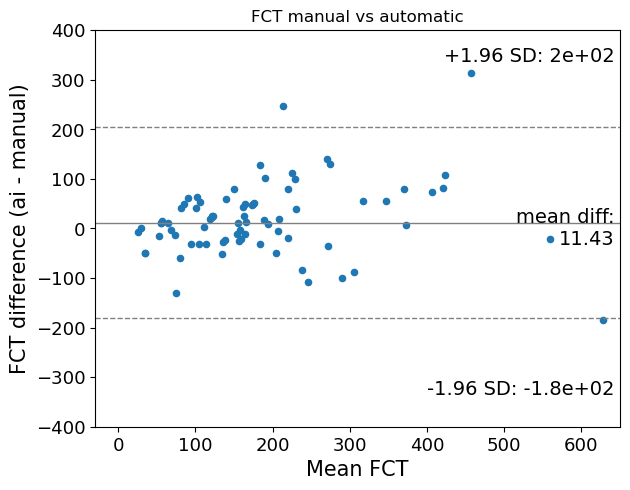

In [32]:
manual_fct, automatic_fct = get_data_filtered(measurements, 'FCT manual', 'FCT automatic')

fig, axes = plt.subplots()

sm.graphics.mean_diff_plot(automatic_fct, manual_fct, ax = axes)
plt.xlabel('Mean FCT')
plt.ylabel('FCT difference (ai - manual)')
plt.title('FCT manual vs automatic')
plt.xlim(-30, 650)
plt.ylim(-400, 400)

(-75.0, 150.0)

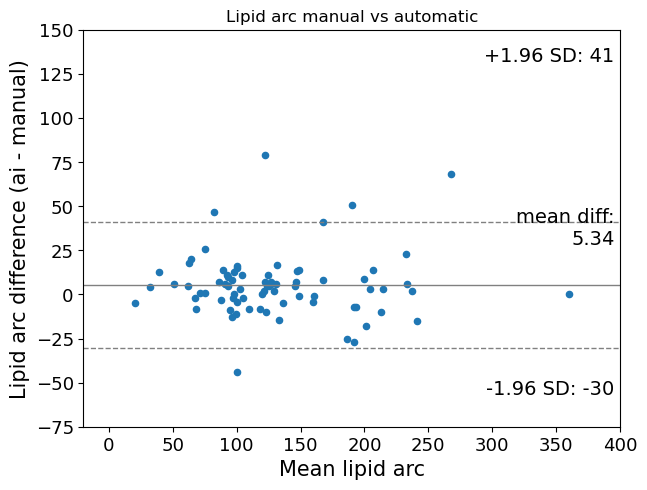

In [33]:
manual_arc, automatic_arc = get_data_filtered(measurements, 'Lipid arc manual', 'Lipid arc automatic')


fig, axes = plt.subplots()

sm.graphics.mean_diff_plot(automatic_arc, manual_arc, ax = axes)
plt.xlabel('Mean lipid arc')
plt.ylabel('Lipid arc difference (ai - manual)')
plt.title('Lipid arc manual vs automatic')
plt.xlim(-20, 400)
plt.ylim(-75, 150)


## Pearson and ICC 

Corr FCT: [[1.         0.71908775]
 [0.71908775 1.        ]]


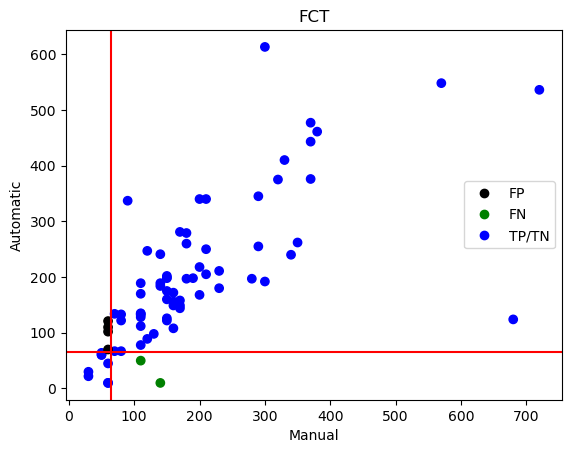

In [34]:
corr_plot(manual_fct, automatic_fct, 65, 'FCT')

Corr Lipid arc: [[1.         0.95450593]
 [0.95450593 1.        ]]


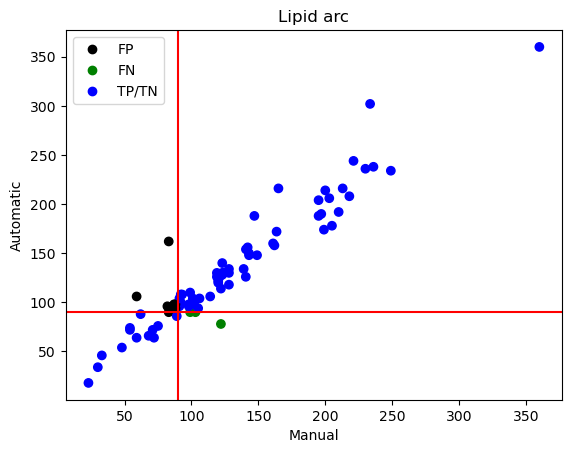

In [35]:
corr_plot(manual_arc, automatic_arc, 90, 'Lipid arc')

In [36]:
calculate_icc(automatic_fct, manual_fct)

,Type,Description,ICC,F,df1,df2,pval,CI95%
0,ICC1,Single raters absolute,0.718883,6.114479,76,77,4.697990e-14,"[0.59, 0.81]"
1,ICC2,Single random raters,0.718900,6.117162,76,76,6.153917e-14,"[0.59, 0.81]"
2,ICC3,Single fixed raters,0.718989,6.117162,76,76,6.153917e-14,"[0.59, 0.81]"
3,ICC1k,Average raters absolute,0.836454,6.114479,76,77,4.697990e-14,"[0.74, 0.9]"
4,ICC2k,Average random raters,0.836465,6.117162,76,76,6.153917e-14,"[0.74, 0.9]"
5,ICC3k,Average fixed raters,0.836525,6.117162,76,76,6.153917e-14,"[0.74, 0.9]"


In [37]:
calculate_icc(automatic_arc, manual_arc)

,Type,Description,ICC,F,df1,df2,pval,CI95%
0,ICC1,Single raters absolute,0.951218,39.999000,76,77,2.587061e-41,"[0.92, 0.97]"
1,ICC2,Single random raters,0.951299,42.914264,76,76,5.726546e-42,"[0.92, 0.97]"
2,ICC3,Single fixed raters,0.954457,42.914264,76,76,5.726546e-42,"[0.93, 0.97]"
3,ICC1k,Average raters absolute,0.974999,39.999000,76,77,2.587061e-41,"[0.96, 0.98]"
4,ICC2k,Average random raters,0.975042,42.914264,76,76,5.726546e-42,"[0.96, 0.98]"
5,ICC3k,Average fixed raters,0.976698,42.914264,76,76,5.726546e-42,"[0.96, 0.99]"
